### Spectrogram, Power Spectral Density on a frequency chirp

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [2]:
sns.set(style='darkgrid')

**Generate a chirp signal**

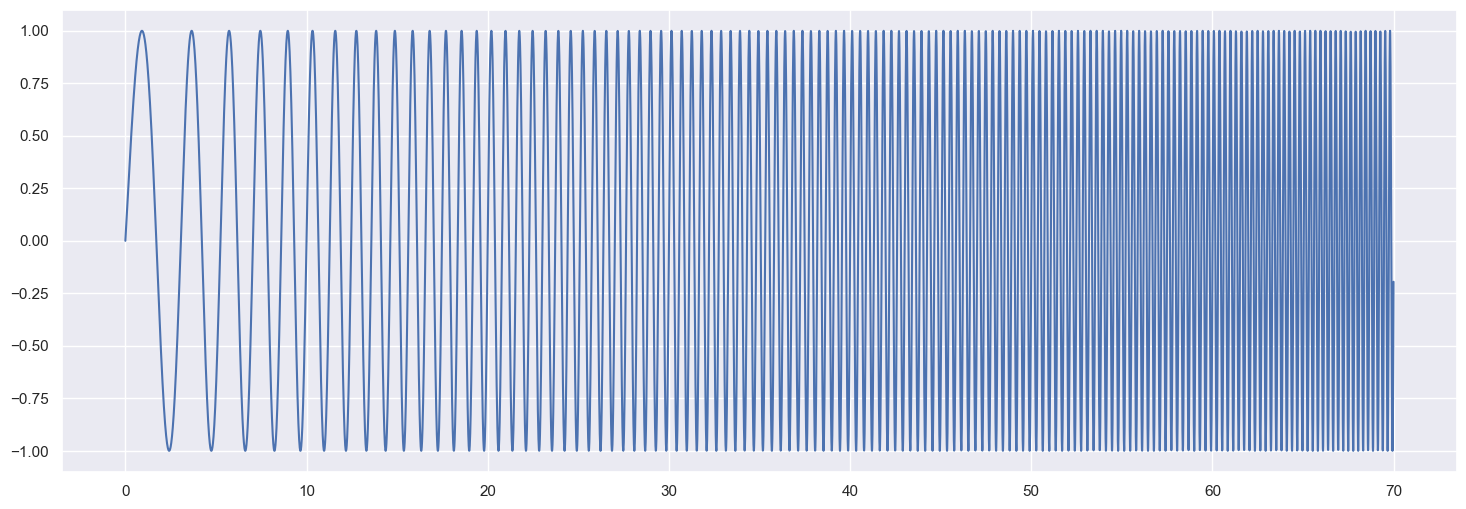

In [3]:
np.random.seed(0)

Fs = 120
time_step = 1/Fs
time_vec = np.arange(0,70,time_step)

sig = np.sin(0.5*np.pi*time_vec*(1 + .1 * time_vec))

plt.figure(figsize=(18,6))
plt.plot(time_vec,sig)
plt.show()

**Plotting the spectrum**

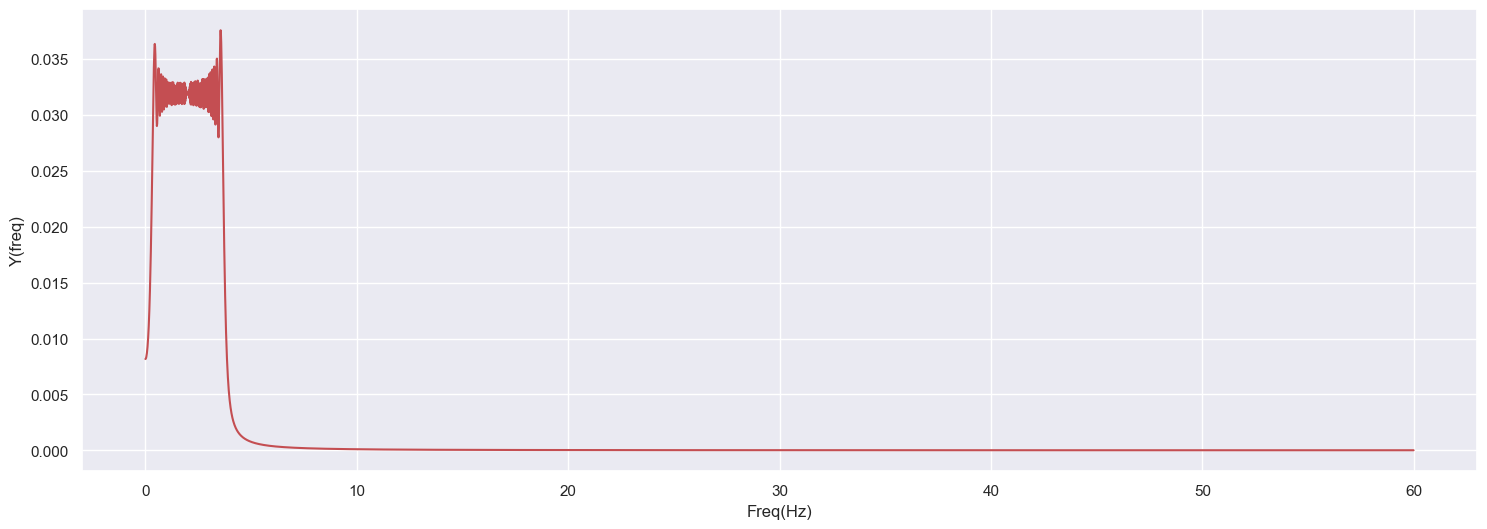

In [4]:
n = len(sig)
k = np.arange(n)
T = n/Fs
freq = k/T
freq = freq[range(n//2)]
Y = scipy.fft.fft(sig)/n
Y = Y[range(n//2)]
plt.figure(figsize=(18,6))
plt.plot(freq,abs(Y),'r')
plt.xlabel('Freq(Hz)')
plt.ylabel('Y(freq)')
plt.show()

#### Compute and plot the spectrogram

**The spectrum of the signal on consecutive time windows**

In [5]:
from scipy import signal

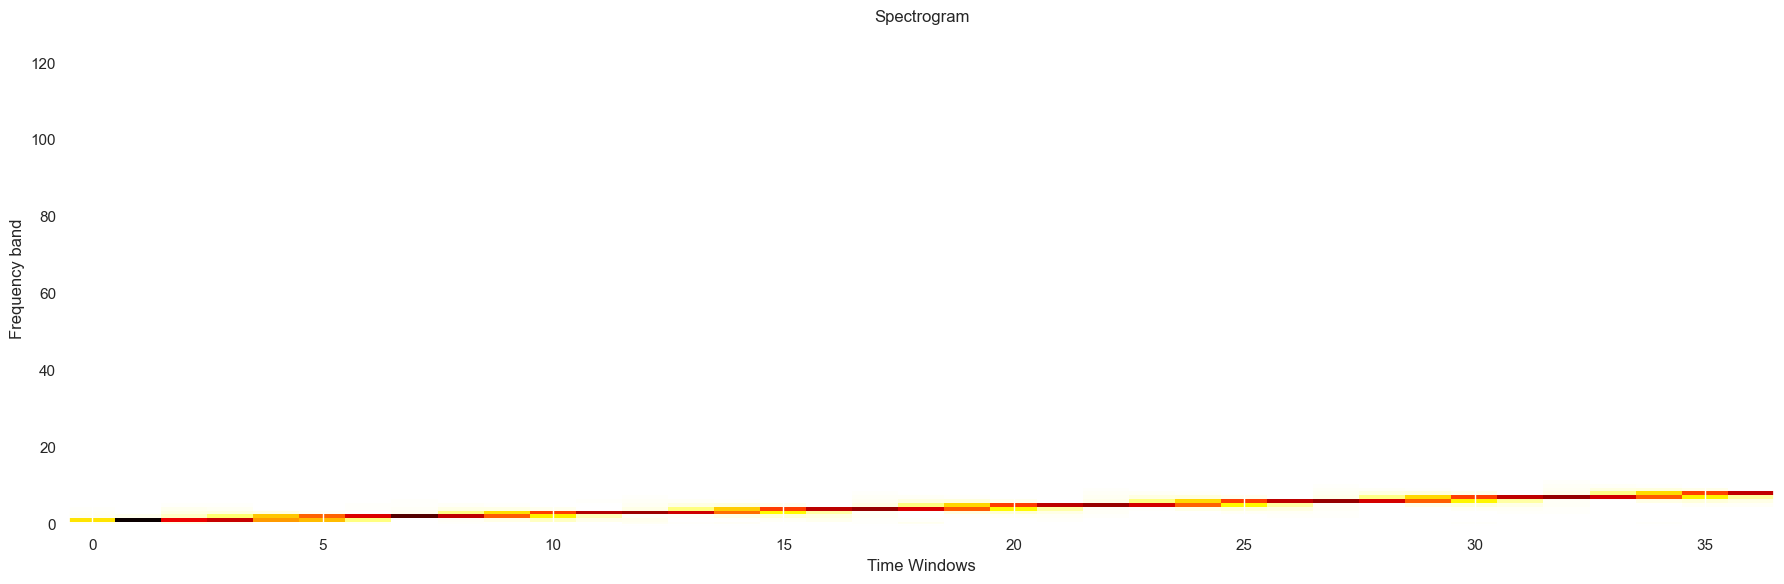

In [6]:
freqs,times,spectrogram  = signal.spectrogram(sig)

plt.figure(figsize=(18,6))
plt.imshow(spectrogram,aspect = 'auto',cmap = 'hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time Windows')
plt.tight_layout()

#### Compute and plot the power spectral density (PSD)

**The power of the signal per frequency band**

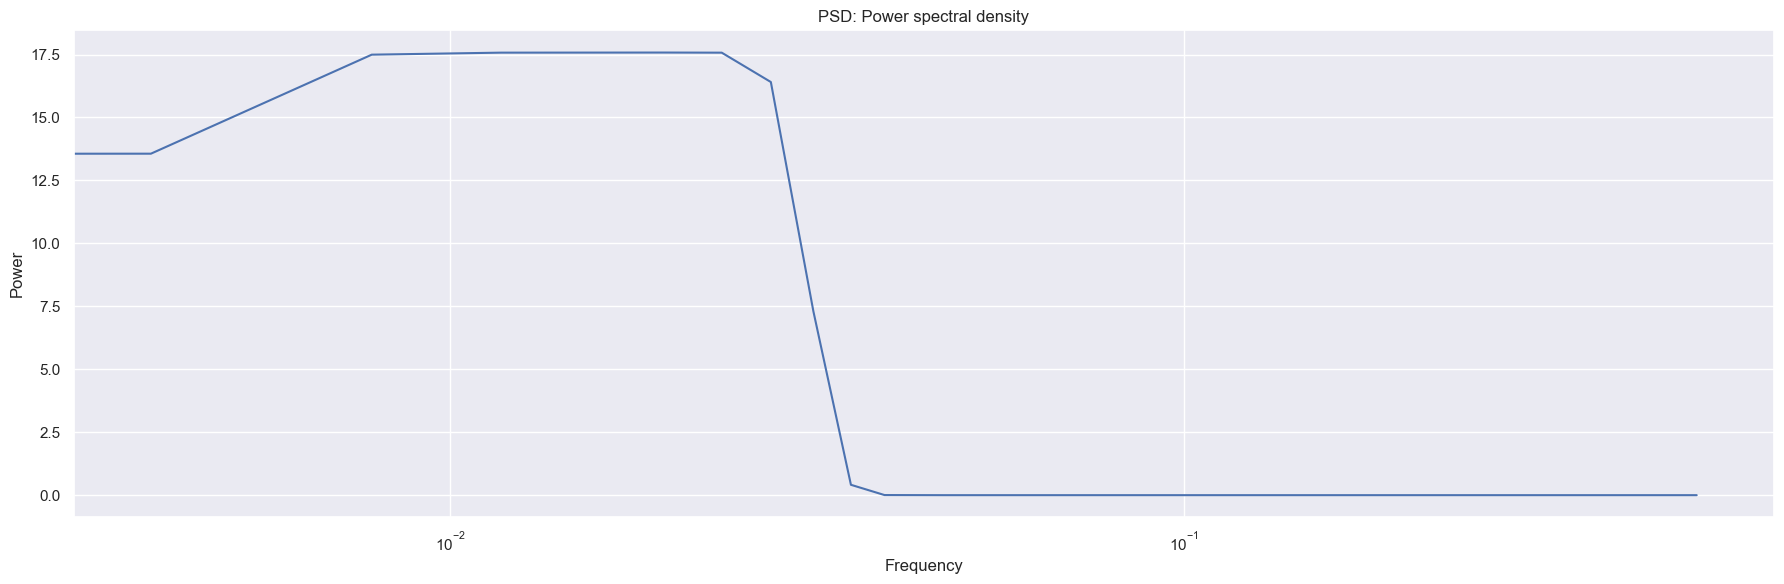

In [7]:
freqs,psd = signal.welch(sig)

plt.figure(figsize=(18,6))
plt.semilogx(freqs,psd)
plt.title('PSD: Power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()